In [2]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

# ЗАДАЧА
Решить дифур
$$ m \cdot r''  = - \frac {\mu m r} {r^3} $$

In [58]:
class Parameters(object):
    pass
param = Parameters()
param.mu = 3.985e14
param.Re = 6371e3
param.alt = 400e3
param.incl = 52 * np.pi /180
param.rad = param.Re + param.alt

sim_param = Parameters()
sim_param.t0 = 0
sim_param.tf = 2 * np.pi /np.sqrt(param.mu / param.rad**3)
sim_param.dt = 1

In [53]:
def ode(t, x, p = param):
    r = x[0:3]
    v = x[3:]
    
    dxdt = np.zeros(6)
    dxdt[0:3] = v
    dxdt[3:] = -p.mu * r / np.linalg.norm(r)**3
    return dxdt

In [56]:
def event_fun(t, x, p=param):
    return x[2]

In [62]:
v0 = np.sqrt(param.mu / param.rad)
x0 = [param.rad, 0, 0, 0, v0*np.cos(param.incl), v0*np.sin(param.incl)]

t_sol = np.arange(sim_param.t0, sim_param.tf, sim_param.dt)

event_fun.terminal = True

event_fun.direction = -1

sol = sci.solve_ivp(ode, (sim_param.t0, sim_param.tf), x0, t_eval = t_sol, rtol = 1e-10, atol = 1e-10, events = event_fun)

x_sol = sol.y.T


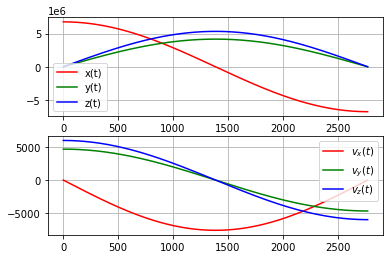

In [63]:
fig1, (ax1, ax2) = plt.subplots(2)

ax1.plot( sol.t, x_sol[:, 0], label='x(t)', color='r')
ax1.plot( sol.t, x_sol[:, 1], label='y(t)', color='g')
ax1.plot( sol.t, x_sol[:, 2], label='z(t)', color='b')

ax2.plot( sol.t, x_sol[:, 3], label='$v_x(t)$', color='r')
ax2.plot( sol.t, x_sol[:, 4], label='$v_y(t)$', color='g')
ax2.plot( sol.t, x_sol[:, 5], label='$v_z(t)$', color='b')

ax1.legend()
ax2.legend()

ax1.grid(True)
ax2.grid(True)

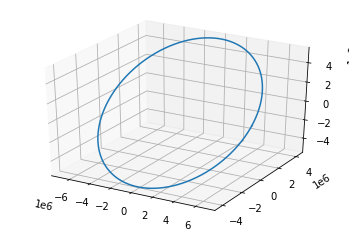

In [52]:
#from mpl_toolrits.mplot3d import Axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(x_sol[:, 0], x_sol[:, 1], x_sol[:, 2])

## Домашнее задание: вывести начальную и конечную точки 